# 1-D Exploratory Data Analysis

In this notebook, do some EDA in one dimension. Pick a column  (or a set of columns) you're interested in looking at. Calculate some summary statistics (like mean,median,min,max,sd). Then, make some plots to visualize the distribution of the data. Distirbution plots include things like histograms, boxplots, dotplots, beeswarms, and violin plots. Review [ggplot-intro](https://github.com/data4news/ggplot-intro) for examples of these kinds of distribution plots.

### Standard Python and R imports

In [27]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [29]:
%%R

# My commonly used R imports

require('tidyverse')

## Load the data

In [30]:
%%R
 
# Import data with R
df <- read_csv('merged_data.csv', show_col_types = FALSE)
df %>% head(4)

# A tibble: 4 × 42
        GEOID NAME      moe population means_transit_car means_transit_bus  kids
        <dbl> <chr>   <dbl>      <dbl>             <dbl>             <dbl> <dbl>
1 36005000100 Census…   702       6661                NA                NA    NA
2 36005000100 Census…    18         NA                 0                 0    NA
3 36005000100 Census…    77         NA                NA                NA    98
4 36005000100 Census…    25         NA                NA                NA    NA
# ℹ 35 more variables: school_kids <dbl>, med_inc <dbl>, CRASH.DATE <date>,
#   CRASH.TIME <time>, BOROUGH <chr>, ZIP.CODE <dbl>, LATITUDE <dbl>,
#   LONGITUDE <dbl>, LOCATION <chr>, ON.STREET.NAME <chr>,
#   CROSS.STREET.NAME <chr>, OFF.STREET.NAME <chr>,
#   NUMBER.OF.PERSONS.INJURED <dbl>, NUMBER.OF.PERSONS.KILLED <dbl>,
#   NUMBER.OF.PEDESTRIANS.INJURED <dbl>, NUMBER.OF.PEDESTRIANS.KILLED <dbl>,
#   NUMBER.OF.CYCLIST.INJURED <dbl>, NUMBER.OF.CYCLIST.KILLED <dbl>, …


In [31]:
%%R
library(dplyr)

# Group by BOROUGH and summarize the total number of persons killed and injured
borough_summary <- df %>%
  group_by(BOROUGH) %>%
  summarise(
    Total_Killed = sum(NUMBER.OF.PERSONS.KILLED, na.rm = TRUE),
    Total_Injured = sum(NUMBER.OF.PERSONS.INJURED, na.rm = TRUE)
    
  )

# Display the summary
print(borough_summary)


# A tibble: 6 × 3
  BOROUGH       Total_Killed Total_Injured
  <chr>                <dbl>         <dbl>
1 BRONX                   12          3785
2 BROOKLYN                36          7889
3 MANHATTAN               12          3447
4 QUEENS                  35          5985
5 STATEN ISLAND            0           913
6 <NA>                    44          9937


## Summary statistics

Pick a column or set of columns and calculate some summary statistics (like mean,median,min,max,sd).
Hint, you may want to use `group_by` and `summarize`.



In [5]:
%%R 
library(dplyr)

# Filter accidents with "Alcohol involvement" as the contributing factor for vehicle 1, 
# then group by GEOID and BOROUGH, and summarize the total number of persons killed
accidents_summary <- df %>%
  filter(CONTRIBUTING.FACTOR.VEHICLE.1 == "Alcohol Involvement") %>%
  group_by(GEOID, BOROUGH) %>%
  summarise(
    Total_Persons_Killed = sum(NUMBER.OF.PERSONS.KILLED, na.rm = TRUE),
    .groups = 'drop' # This drops the grouping structure afterwards
  ) %>%
  arrange(desc(Total_Persons_Killed)) # Arrange from highest to lowest number of persons killed

# Display the summary
print(accidents_summary)




# A tibble: 175 × 3
         GEOID BOROUGH       Total_Persons_Killed
         <dbl> <chr>                        <dbl>
 1 36005001600 BROOKLYN                         0
 2 36005004200 QUEENS                           0
 3 36005004400 <NA>                             0
 4 36005005100 QUEENS                           0
 5 36005005902 <NA>                             0
 6 36005006000 BROOKLYN                         0
 7 36005006500 QUEENS                           0
 8 36005006800 STATEN ISLAND                    0
 9 36005007800 <NA>                             0
10 36005011502 QUEENS                           0
# ℹ 165 more rows
# ℹ Use `print(n = ...)` to see more rows


In [6]:
%%R

discrete_variables <- c('vs', 'am', 'gear', 'carb')
# 👉 Select the discrete variables only and make a pivot table for each
# so we know how many cars there are in each category (for example, how many automatic vs manual)?

mtcars %>% 
    select(discrete_variables) %>%
    pivot_longer(discrete_variables, names_to = "variable", values_to = "value") %>% 
    group_by(variable, value) %>% 
    summarize(
        count = n()
    )

`summarise()` has grouped output by 'variable'. You can override using the
`.groups` argument.
# A tibble: 13 × 3
# Groups:   variable [4]
   variable value count
   <chr>    <dbl> <int>
 1 am           0    19
 2 am           1    13
 3 carb         1     7
 4 carb         2    10
 5 carb         3     3
 6 carb         4    10
 7 carb         6     1
 8 carb         8     1
 9 gear         3    15
10 gear         4    12
11 gear         5     5
12 vs           0    18
13 vs           1    14


In addition: Warning message:
Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(discrete_variables)

  # Now:
  data %>% select(all_of(discrete_variables))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was
generated. 


## 1-D visualizations (aka distributions)


### Continus variables

For each continuous variable you are interested in, use ggplot to make a plot of the distribution. You can use histograms, dot plots, box plots, beeswarms, etc...(whichever chart type you found most useful). Learn about that variable and give each chart a headline that explains what you're seeing. The chart can also show the mean or median of the variable for reference (for example for a histogram you can add a vertical line through the median).

In [35]:
%%R 
library(dplyr)
library(ggplot2)

# Filter accidents with "Alcohol involvement" as the contributing factor for vehicle 1,
# then group by GEOID and BOROUGH, and summarize the total number of persons killed
accidents_summary <- df %>%
  filter(CONTRIBUTING.FACTOR.VEHICLE.1 == "Alcohol Involvement") %>%
  group_by(GEOID, BOROUGH) %>%
  summarise(
    Total_Persons_Injured = sum(NUMBER.OF.PERSONS.INJURED, na.rm = TRUE),
    .groups = 'drop' # This drops the grouping structure afterwards
  ) %>%
  arrange(desc(Total_Persons_Injured)) # Arrange from highest to lowest number of persons killed

# Display the summary
print(accidents_summary)





# A tibble: 175 × 3
         GEOID BOROUGH   Total_Persons_Injured
         <dbl> <chr>                     <dbl>
 1 36061017200 <NA>                         21
 2 36061016100 BRONX                        15
 3 36081099200 BRONX                        15
 4 36047102801 BRONX                        12
 5 36081062600 <NA>                         12
 6 36081094700 <NA>                         12
 7 36005035000 BROOKLYN                      9
 8 36047017800 <NA>                          9
 9 36047046201 MANHATTAN                     9
10 36061019400 <NA>                          9
# ℹ 165 more rows
# ℹ Use `print(n = ...)` to see more rows


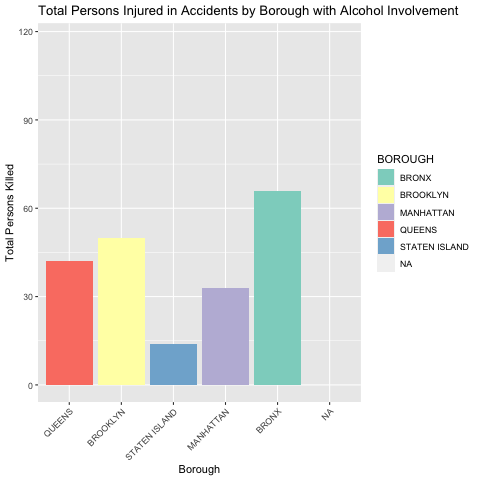

In [39]:
%%R
library(dplyr)
library(ggplot2)

ggplot(accidents_summary, aes(x = reorder(BOROUGH, Total_Persons_Injured), y = Total_Persons_Injured, fill = BOROUGH)) +
  geom_bar(stat = "identity") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) + # Rotate X-axis labels for better readability
  labs(x = "Borough", y = "Total Persons Killed", title = "Total Persons Injured in Accidents by Borough with Alcohol Involvement") +
  scale_fill_brewer(palette = "Set3") # Use a color palette for aesthetic purposes

In [7]:
%%R
# the most common contributing factors for accidents
df %>%
  count(CONTRIBUTING.FACTOR.VEHICLE.1, sort = TRUE) %>%
  head(100)

# A tibble: 50 × 2
   CONTRIBUTING.FACTOR.VEHICLE.1      n
   <chr>                          <int>
 1 Driver Inattention/Distraction 15021
 2 Unspecified                    13718
 3 Failure to Yield Right-of-Way   3827
 4 Following Too Closely           3145
 5 Passing or Lane Usage Improper  2389
 6 Unsafe Speed                    2266
 7 Passing Too Closely             2044
 8 Backing Unsafely                1911
 9 Traffic Control Disregarded     1768
10 Other Vehicular                 1642
# ℹ 40 more rows
# ℹ Use `print(n = ...)` to see more rows


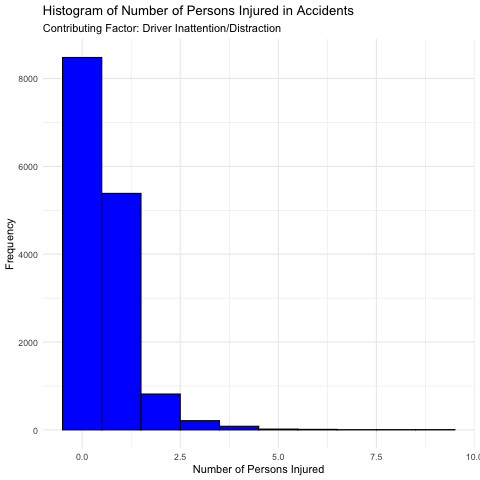

In [11]:
%%R

library(ggplot2)


# Filter rows where any of the contributing factor vehicle columns match "Driver Inattention/Distraction"
df_filtered <- df %>%
  filter(CONTRIBUTING.FACTOR.VEHICLE.1 == "Driver Inattention/Distraction")

# Create histogram of the number of persons injured
ggplot(df_filtered, aes(x = NUMBER.OF.PERSONS.INJURED)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black") +
  theme_minimal() +
  labs(title = "Histogram of Number of Persons Injured in Accidents",
       subtitle = "Contributing Factor: Driver Inattention/Distraction",
       x = "Number of Persons Injured",
       y = "Frequency")


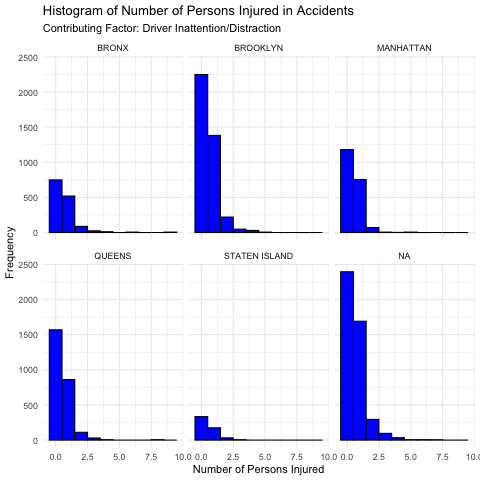

In [12]:
%%R

library(ggplot2)


# Filter rows where any of the contributing factor vehicle columns match "Driver Inattention/Distraction"
df_filtered <- df %>%
  filter(CONTRIBUTING.FACTOR.VEHICLE.1 == "Driver Inattention/Distraction")

# Create histogram of the number of persons injured
ggplot(df_filtered, aes(x = NUMBER.OF.PERSONS.INJURED)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black") +
  theme_minimal() +
  labs(title = "Histogram of Number of Persons Injured in Accidents",
       subtitle = "Contributing Factor: Driver Inattention/Distraction",
       x = "Number of Persons Injured",
       y = "Frequency")+
       facet_wrap(~BOROUGH)

### Discrete Variables

If there are any discrete variables you'd like to analyze, you can do that with charts here.

In [17]:
%%R
#find the census tract with the highest number of accidents and output the zipcode
df %>%
  count(GEOID, sort = TRUE) %>%
  head(1)

# A tibble: 1 × 2
        GEOID     n
        <dbl> <int>
1 36081030600   270


# A tibble: 26 × 2


   ZIP.CODE BOROUGH      
      <dbl> <chr>        
 1    11218 BROOKLYN     
 2    10022 MANHATTAN    
 3       NA <NA>         
 4    10473 BRONX        
 5    11236 BROOKLYN     
 6    10029 MANHATTAN    
 7    10309 STATEN ISLAND
 8    11201 BROOKLYN     
 9    11221 BROOKLYN     
10    11412 QUEENS       
# ℹ 16 more rows
# ℹ Use `print(n = ...)` to see more rows


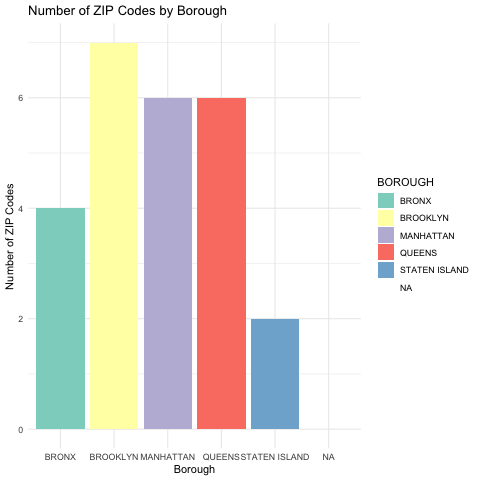

In [25]:
%%R
library(dplyr)

# Identify the GEOID of the census tract with the highest number of accidents
top_geo_id <- df %>%
  count(GEOID, sort = TRUE) %>%
  head(1) %>%
  pull(GEOID)

# Filter the original dataset to find rows that match the GEOID
# and retrieve the distinct ZIP codes and boroughs associated with it
zip_codes_boroughs <- df %>%
  filter(GEOID == top_geo_id) %>%
  select(ZIP.CODE, BOROUGH) %>%
  distinct()

# Print the ZIP codes and boroughs
print(zip_codes_boroughs)

# make a bar chart of the number of zip_codes_boroughs
ggplot(zip_codes_boroughs, aes(x = BOROUGH, fill = BOROUGH)) +
  geom_bar() +
  labs(title = "Number of ZIP Codes by Borough",
       x = "Borough",
       y = "Number of ZIP Codes") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set3")

